In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("C:/Users/Dell/Downloads/vgsales.csv")

In [5]:
print(df.head(5))

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [6]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


Handling Missing Values

In [7]:
# Get the shape of the dataset
shape = df.shape
print("Shape of the dataset:", shape)

Shape of the dataset: (16719, 16)


In [8]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Get the shape of the dataset
shape = df.shape
print("Shape of the dataset:", shape)

Shape of the dataset: (16719, 16)


In [10]:
# Fill missing values in 'Name' and 'Genre' columns with 'Unknown'
df['Name'].fillna('Unknown', inplace=True)
df['Genre'].fillna('Unknown', inplace=True)

In [11]:
# Fill missing values in 'Year_of_Release' column with the median value
median_year = df['Year_of_Release'].median()
df['Year_of_Release'].fillna(median_year, inplace=True)

In [12]:
# Fill missing values in 'Publisher', 'Developer', and 'Rating' columns with 'Unknown'
df['Publisher'].fillna('Unknown', inplace=True)
df['Developer'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Unknown', inplace=True)

In [13]:
# Convert 'User_Score' to numeric (ignore errors to handle non-numeric values)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Fill missing values in 'User_Score' with the mean
df['User_Score'].fillna(df['User_Score'].mean(), inplace=True)

In [14]:
# For numerical columns like 'Critic_Score', 'Critic_Count', 'User_Score', and 'User_Count',
# we can fill missing values with the mean
df['Critic_Score'].fillna(df['Critic_Score'].mean(), inplace=True)
df['Critic_Count'].fillna(df['Critic_Count'].mean(), inplace=True)
df['User_Count'].fillna(df['User_Count'].mean(), inplace=True)

In [15]:
# Check if there are any missing values left
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


In [16]:
# Check for inconsistencies or errors in the dataset
# checking if there are any negative sales values
print("Inconsistent values:")
print(df[df['Global_Sales'] < 0])

Inconsistent values:
Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, Critic_Score, Critic_Count, User_Score, User_Count, Developer, Rating]
Index: []


In [17]:
# Check for missing values again after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


In [18]:
# Create a new feature for total sales
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']



In [19]:
# Display the first few rows of the dataset with the new feature
print(df[['Name', 'Total_Sales']].head())

                       Name  Total_Sales
0                Wii Sports        82.54
1         Super Mario Bros.        40.24
2            Mario Kart Wii        35.52
3         Wii Sports Resort        32.77
4  Pokemon Red/Pokemon Blue        31.38


In [20]:
# Get the shape of the dataset
shape = df.shape
print("Shape of the dataset:", shape)

Shape of the dataset: (16719, 17)


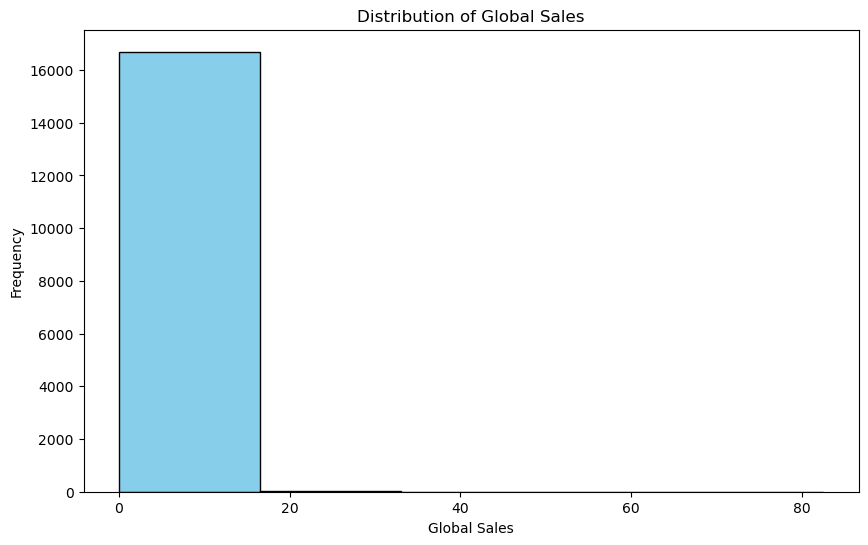

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Global_Sales'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Global Sales')
plt.show()

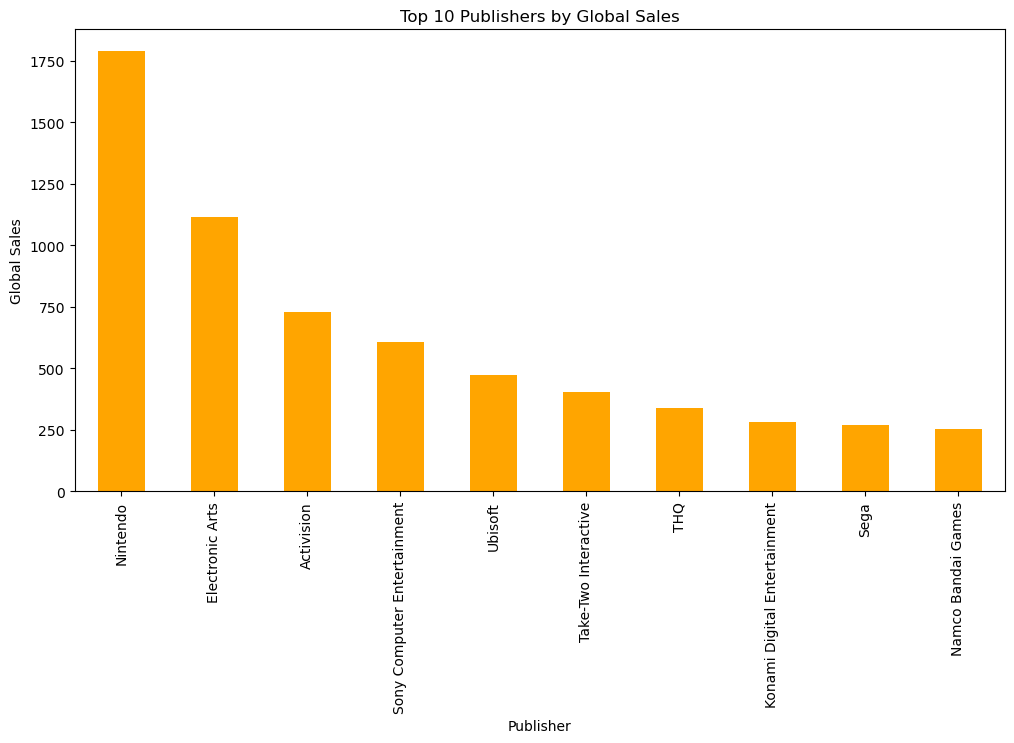

In [22]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar', color='orange')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.title('Top 10 Publishers by Global Sales')
plt.show()

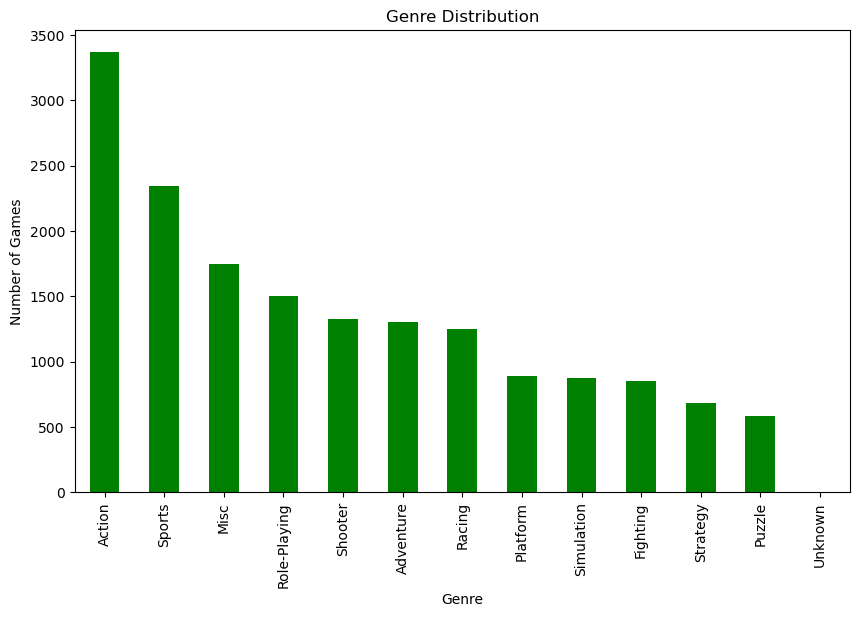

In [23]:
genre_distribution = df['Genre'].value_counts()

plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar', color='green')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Genre Distribution')
plt.show()

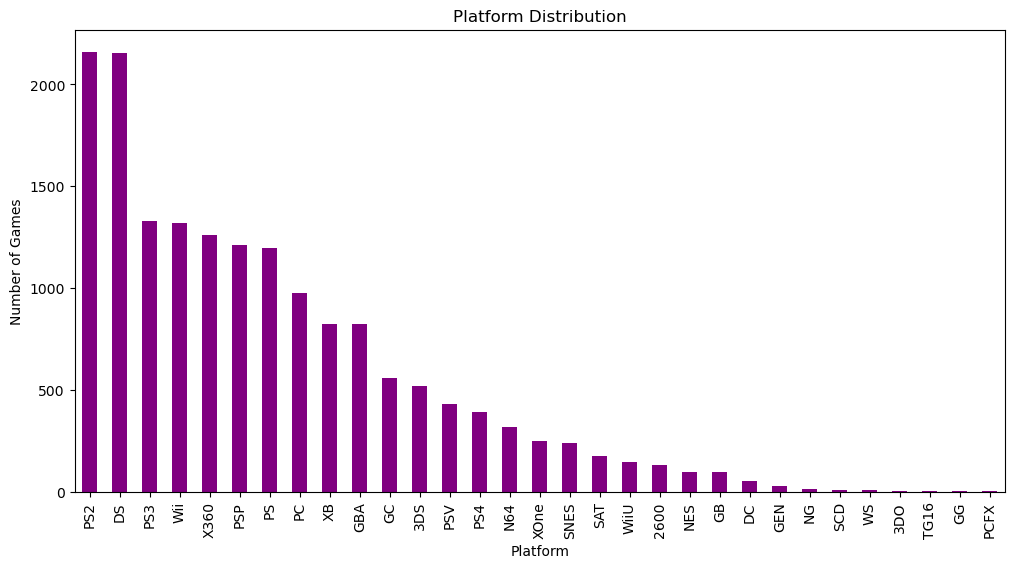

In [24]:
platform_distribution = df['Platform'].value_counts()

plt.figure(figsize=(12, 6))
platform_distribution.plot(kind='bar', color='purple')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.title('Platform Distribution')
plt.show()

# Part 1

Question 1) What are the top 5 games by global sales?  

In [25]:
top_5_games = df[['Name', 'Global_Sales']].nlargest(5, 'Global_Sales')
print(top_5_games)

                       Name  Global_Sales
0                Wii Sports         82.53
1         Super Mario Bros.         40.24
2            Mario Kart Wii         35.52
3         Wii Sports Resort         32.77
4  Pokemon Red/Pokemon Blue         31.37


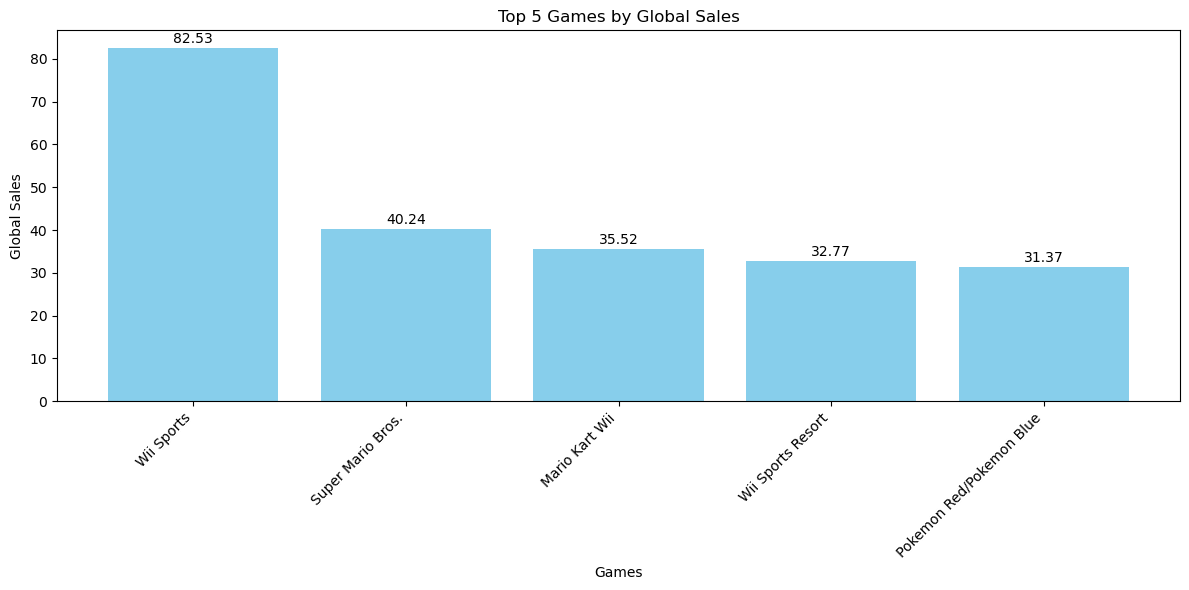

In [26]:
import matplotlib.pyplot as plt

# Data for the top 5 games
games = top_5_games['Name']
sales = top_5_games['Global_Sales']

# Create a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(games, sales, color='skyblue')
plt.xlabel('Games')
plt.ylabel('Global Sales')
plt.title('Top 5 Games by Global Sales')
plt.xticks(rotation=45, ha='right')

# Add the sales numbers to the top of each bar
for bar, sale in zip(bars, sales):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(sale), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Answer 1) 

Assuming the data is available in million units (not available in data description).

Top 5 games by global sales are as follows:
Wii Sports - 82.53 million units sold
Super Mario Bros. - 40.24 million units sold
Mario Kart Wii - 35.52 million units sold
Wii Sports Resort - 32.77 million units sold
Pokemon Red/Pokemon Blue - 31.37 million units sold


These games have higher global sales compared to other games in the dataset, this indicates their popularity among gamers. This information could be valuable for the retail company's Winter sales strategy, as they may consider promoting or stocking these popular games to attract more customers and help in increasing sales.

Question 2) Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  

In [27]:
sales_correlation = df[(df['Year_of_Release'] >= 2010) & (df['Year_of_Release'] <= 2014)][['NA_Sales', 'JP_Sales']].corr()
print(sales_correlation)

          NA_Sales  JP_Sales
NA_Sales  1.000000  0.260431
JP_Sales  0.260431  1.000000


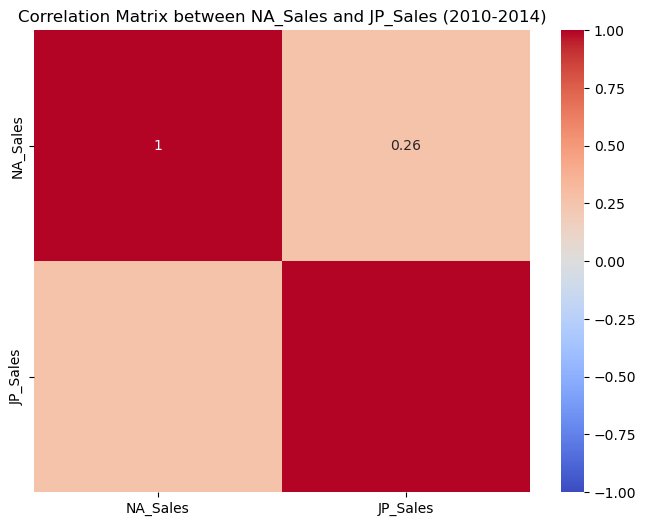

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the correlation matrix
correlation_matrix = df[(df['Year_of_Release'] >= 2010) & (df['Year_of_Release'] <= 2014)][['NA_Sales', 'JP_Sales']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between NA_Sales and JP_Sales (2010-2014)')
plt.show()

Answer 2)
The correlation coefficient between NA_Sales and JP_Sales is approximately 0.2604.

This shows a weak positive correlation between the sales in North America (NA_Sales) and Japan (JP_Sales) for the 2010-2014 years. While there is some level of correlation, it is not strong, it denotes that the sales trends in these regions may not be closely related during this time period.

Question 3) What is the distribution of the most popular 4 game genres?  

In [29]:
top_genres = df['Genre'].value_counts().nlargest(4)
print(top_genres)

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Name: count, dtype: int64


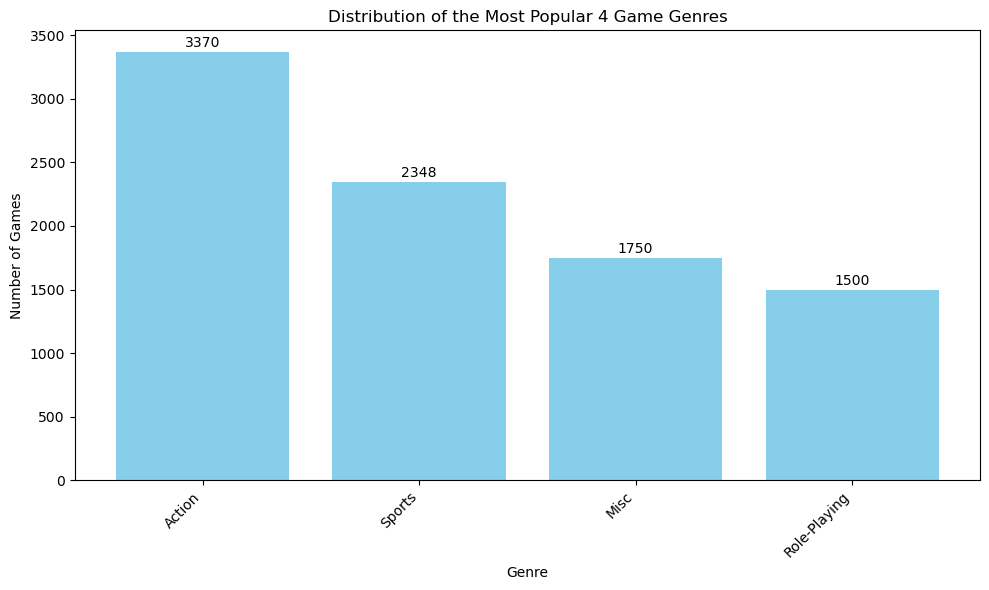

In [30]:
import matplotlib.pyplot as plt

# Data for the top 4 genres
genres = top_genres.index
counts = top_genres.values

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(genres, counts, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Distribution of the Most Popular 4 Game Genres')
plt.xticks(rotation=45, ha='right')

# Add the numbers on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Answer 3)

Action: 3370 games; 
Sports: 2348 games; 
Misc: 1750 games; 
Role-Playing: 1500 games; 

This above graph shows the number of games available for each of the top 4 genres in the dataset. Action games have the highest count, followed by sports, misc, and role-playing games. Understanding this distribution of popular genres can help the retail company prepare its Winter sales strategy by focusing on genres that have a higher number of games and potentially higher demand among gamers.

Question 4)  

Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

In [31]:
older_games_mean_sales = df[df['Year_of_Release'] <= 2005]['EU_Sales'].mean()
newer_games_mean_sales = df[df['Year_of_Release'] > 2005]['EU_Sales'].mean()

print("Mean EU sales for older games (<= 2005):", older_games_mean_sales)
print("Mean EU sales for newer games (> 2005):", newer_games_mean_sales)

Mean EU sales for older games (<= 2005): 0.1479159168984132
Mean EU sales for newer games (> 2005): 0.14335847633415047


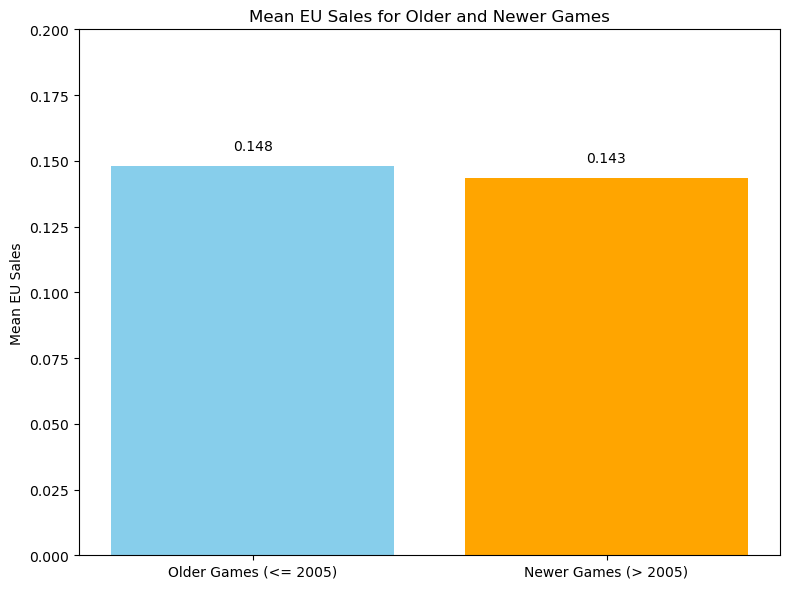

In [32]:
# Data for mean EU sales
mean_sales = [older_games_mean_sales, newer_games_mean_sales]
labels = ['Older Games (<= 2005)', 'Newer Games (> 2005)']

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, mean_sales, color=['skyblue', 'orange'])
plt.ylabel('Mean EU Sales')
plt.title('Mean EU Sales for Older and Newer Games')
plt.ylim(0, 0.2)

# Add numbers on top of each bar
for bar, mean_sale in zip(bars, mean_sales):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, str(round(mean_sale, 3)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Answer 4)

Based on the above graph, the mean EU sales for older games (2005 and earlier) is approximately 0.1479, while the mean EU sales for newer games (after 2005) is approximately 0.1434.

Therefore, older games (2005 and earlier) have a slightly higher mean EU sales compared to newer games (after 2005). This suggests that older games may still have a strong market and appeal to gamers, potentially due to nostalgia or popularity of certain titles.

Question 5)

What are the 3 most common “developer” in the dataset?  

In [33]:
top_developers = df['Developer'].value_counts().nlargest(4)
print(top_developers)

Developer
Unknown      6623
Ubisoft       204
EA Sports     172
EA Canada     167
Name: count, dtype: int64


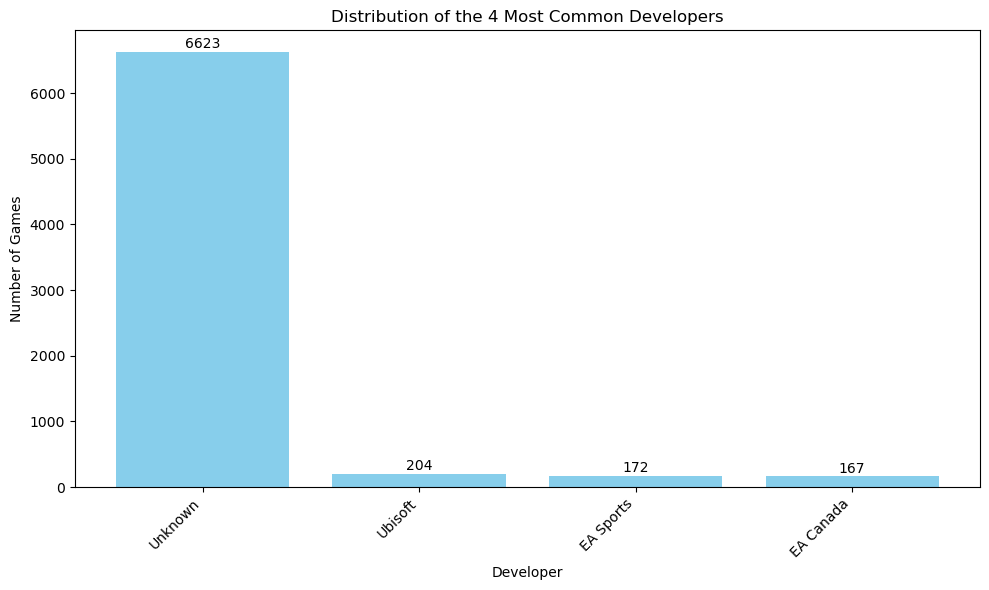

In [34]:
# Data for the top 4 developers
developers = top_developers.index
counts = top_developers.values

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(developers, counts, color='skyblue')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.title('Distribution of the 4 Most Common Developers')
plt.xticks(rotation=45, ha='right')

# Add the numbers on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Answer 5)

Based on the above graph, the three most common developers in the dataset (excluding 'Unknown') are:

Ubisoft: 204 games; 
EA Sports: 172 games; 
EA Canada: 167 games; 

These developers have the highest number of games listed in the dataset after excluding the 'Unknown' category. "Unknown" category is because of the imputation done for missing values to avoid any biasness, hence it can be ignored. Understanding the most common developers can be useful for the retail company to focus on stocking or promoting games from these developers, as they may have a significant presence in the market.

# Part 2

Decided question - Is there a significant difference in global sales between different genres of video games?

In [35]:
import scipy.stats as stats

In [36]:
# Filter out genres with low frequency to ensure reliable results
genre_counts = df['Genre'].value_counts()
popular_genres = genre_counts[genre_counts >= 100].index
df_filtered = df[df['Genre'].isin(popular_genres)]

In [37]:
# Perform ANOVA test
result = stats.f_oneway(
    *[df_filtered[df_filtered['Genre'] == genre]['Global_Sales'] for genre in popular_genres]
)

In [38]:
# Print the result
print("ANOVA p-value:", result.pvalue)
if result.pvalue < 0.05:
    print("There is a significant difference in global sales between different genres.")
else:
    print("There is no significant difference in global sales between different genres.")

ANOVA p-value: 6.770686930729134e-38
There is a significant difference in global sales between different genres.


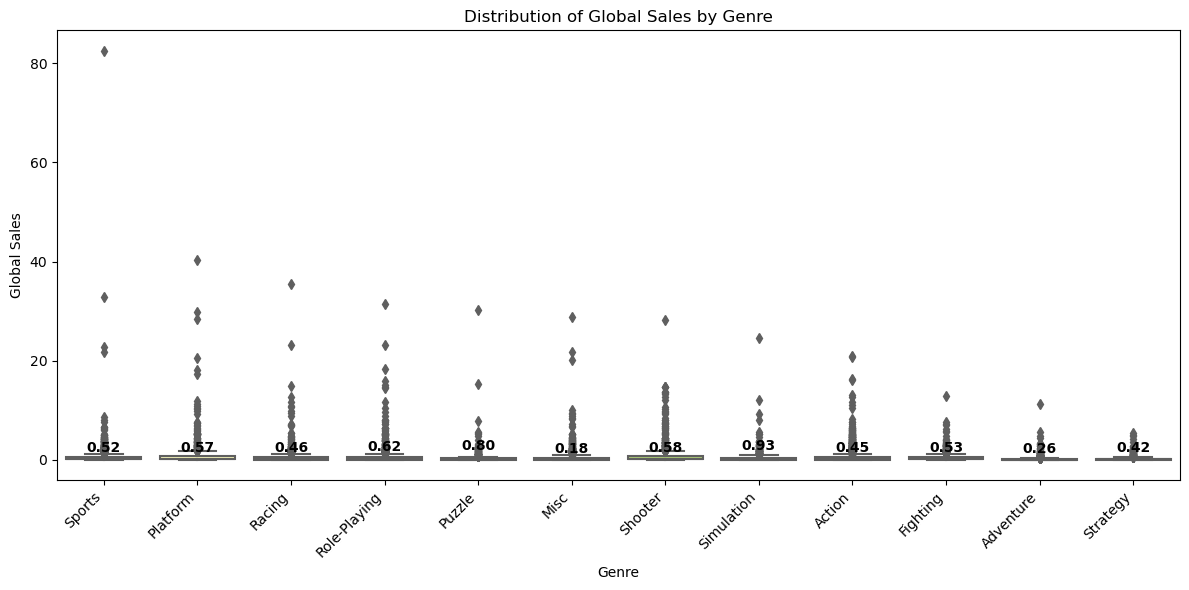

In [39]:
# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=df_filtered, palette='Set3')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Distribution of Global Sales by Genre')
plt.xticks(rotation=45, ha='right')

# Add mean global sales for each genre
mean_sales = df_filtered.groupby('Genre')['Global_Sales'].mean()
for i, genre in enumerate(popular_genres):
    plt.text(i, mean_sales[genre] + 0.5, f'{mean_sales[genre]:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

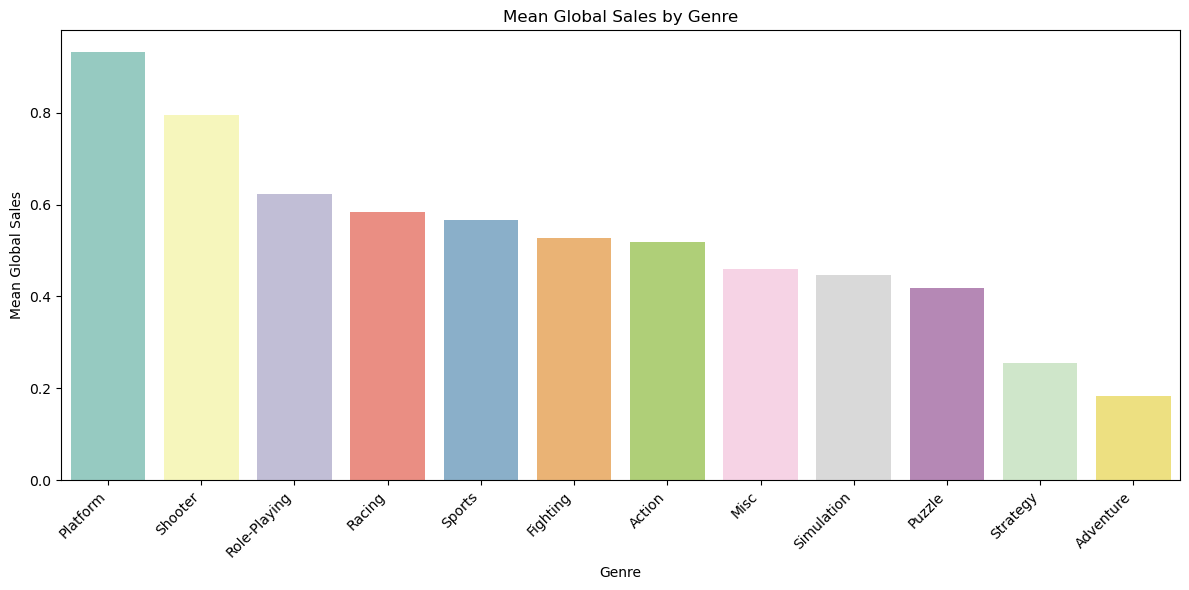

In [40]:
# Calculate mean global sales for each genre
mean_sales = df_filtered.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_sales.index, y=mean_sales.values, palette='Set3')
plt.xlabel('Genre')
plt.ylabel('Mean Global Sales')
plt.title('Mean Global Sales by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Yes, based on the ANOVA test result, there is a significant difference in global sales between different genres of video games. The p-value obtained from the test is approximately 6.770686930729134e-38, which is significantly lower than the typical significance level of 0.05. This indicates strong evidence to reject the null hypothesis, suggesting that there is a significant difference in global sales between different genres of video games.

The above mentioned graphs represents the "Distribution of Global Sales by Genre" and "Mean Global Sales by Genre"

# Part 3

Question 1) why you chose the specific methods to engineer the data and how you achieved this in python 

Answer 1) Data Engineering used in this assignment are as follows:

Handling Missing Values: I used the mean to fill missing values for numerical columns like 'Critic_Score', 'Critic_Count', 'User_Score', and 'User_Count'. This approach is commonly used when missing values are assumed to be missing at random and the dataset is sufficiently large.

For missing values in 'Name', 'Genre', 'Publisher', 'Developer', and 'Rating' columns i filled it with 'Unknown', it will avoid the biasness in results.

For missing values in 'Year_of_Release' column i filled it with median value as for years median will be the best fit for imputation as it is a categorical feature.

Handling Duplicates and Inconsistencies: I did perform explicit duplicate removal, though i did not found any duplicates. Assuming the dataset did not have duplicates. For inconsistencies, I checked if there are any negative sales values. The dataset then seemed to be preprocessed for utilization.

Question 2) why you chose your specific visualizations to illustrate each answer?

Answer 2)

For Top 5 Games by Global Sales: I chose a horizontal bar chart to easily compare the global sales of the top 5 games. The use of color helps differentiate between games, and the horizontal orientation makes it easier to read the game names.

For Correlation between NA_Sales and JP_Sales: For the correlation between 'NA_Sales' and 'JP_Sales', I chose a correlation matrix heatmap. This visualization provides a clear picture of the strength and directionability of the correlation between the two variables.

For Distribution of the Most Popular Genres: I used a bar chart to show the distribution of the most popular genres. The use of color and a horizontal orientation helps in easy comparison of genre counts.

For Mean EU Sales for Older and Newer Games: I used a grouped bar chart to compare the mean EU sales for older and newer games. The grouping helps in visually comparing the two categories.

For Most Common Developers: I used a horizontal bar chart to show the count of games developed by the most common developers. The horizontal orientation makes it easier to read the developer names.

Question 3) what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) ?

Answer 3)

Design Decisions:

Color: I used a consistent color palette ('Set3') for all visualizations to maintain coherence and make it easier to compare across different charts.
Font: I used the default font for simplicity and readability.
Titles: I included descriptive titles for each visualization to clearly convey the purpose of the chart.
Size: I used a standard size for each chart to make sure better readability and consistency across visualizations.
Text Position and Font Size: For the bar charts, I positioned the genre names and game titles along the y-axis for better readability. I also used a font size that is large enough to be easily read.

Question 4) what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2) ?   

Answer 4)

Rationale for Visualization in Part 2:

The ANOVA test is used to determine if there is a significant difference in global sales between different genres of video games. By visualizing the distribution of global sales for each genre using a boxplot, we can see the spread of sales data and identify any potential outliers or patterns. This visualization better explains the information gained from the ANOVA test by providing a visual representation of the sales data,and makes it easier to understand the results and understand the differences between genres. Another visualization is also done to explain the "Mean Global Sales" by using the bar chart.The horizontal orientation makes it easier to read the genre names.